In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import torch

In [2]:
BASE_DIR = "./experiments/model-test"
PROFILE = "one-layer-sum"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [ ]:
GENERATE = False
TRAIN = True
EVAL = False

====== Generating profile sum-10k ======


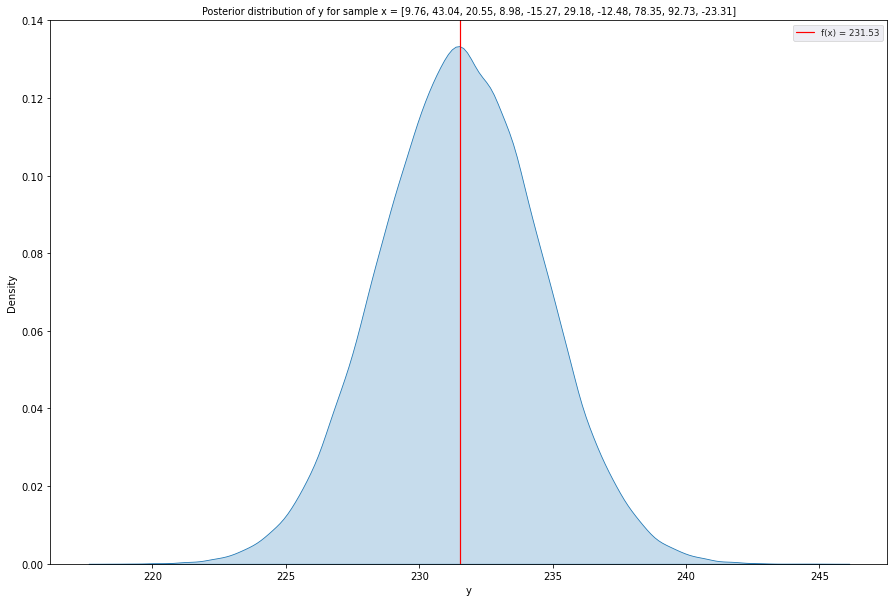

In [5]:
generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [6]:
train.train(config, f"{BASE_DIR}")

Using device: cpu
===== Training profile one-layer-sum =====
[0:00:01][epoch 1] elbo: 2434548.68 rmse: 295.31
[0:00:06][epoch 10] elbo: 752026.20 rmse: 192.47
[0:00:13][epoch 20] elbo: 661807.50 rmse: 204.77
[0:00:19][epoch 30] elbo: 587979.63 rmse: 190.53


In [8]:
eval.eval(config, dataset_config, f"{BASE_DIR}")

Loaded model and parameters from ./experiments/model-test/one-layer-sum/model
using device: cpu
====== evaluating profile one-layer-sum ======


TypeError: mean() received an invalid combination of arguments - got (dtype=NoneType, out=NoneType, axis=int, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)
